In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times"

In [5]:
df = pd.read_csv("../data/data.csv", skiprows=1)

In [6]:
df.head()

,group,z,theta,z_dot,theta_dot,u
0,0,0.227785,1.471305,-0.895184,-0.101737,3.190453
1,0,0.197610,1.467876,-0.788371,-1.460330,2.985523
2,0,0.171036,1.418651,-0.688210,-2.817190,2.685549
3,0,0.147837,1.323690,-0.597416,-4.179649,2.102403
4,0,0.127700,1.182803,-0.525018,-5.533002,1.084677


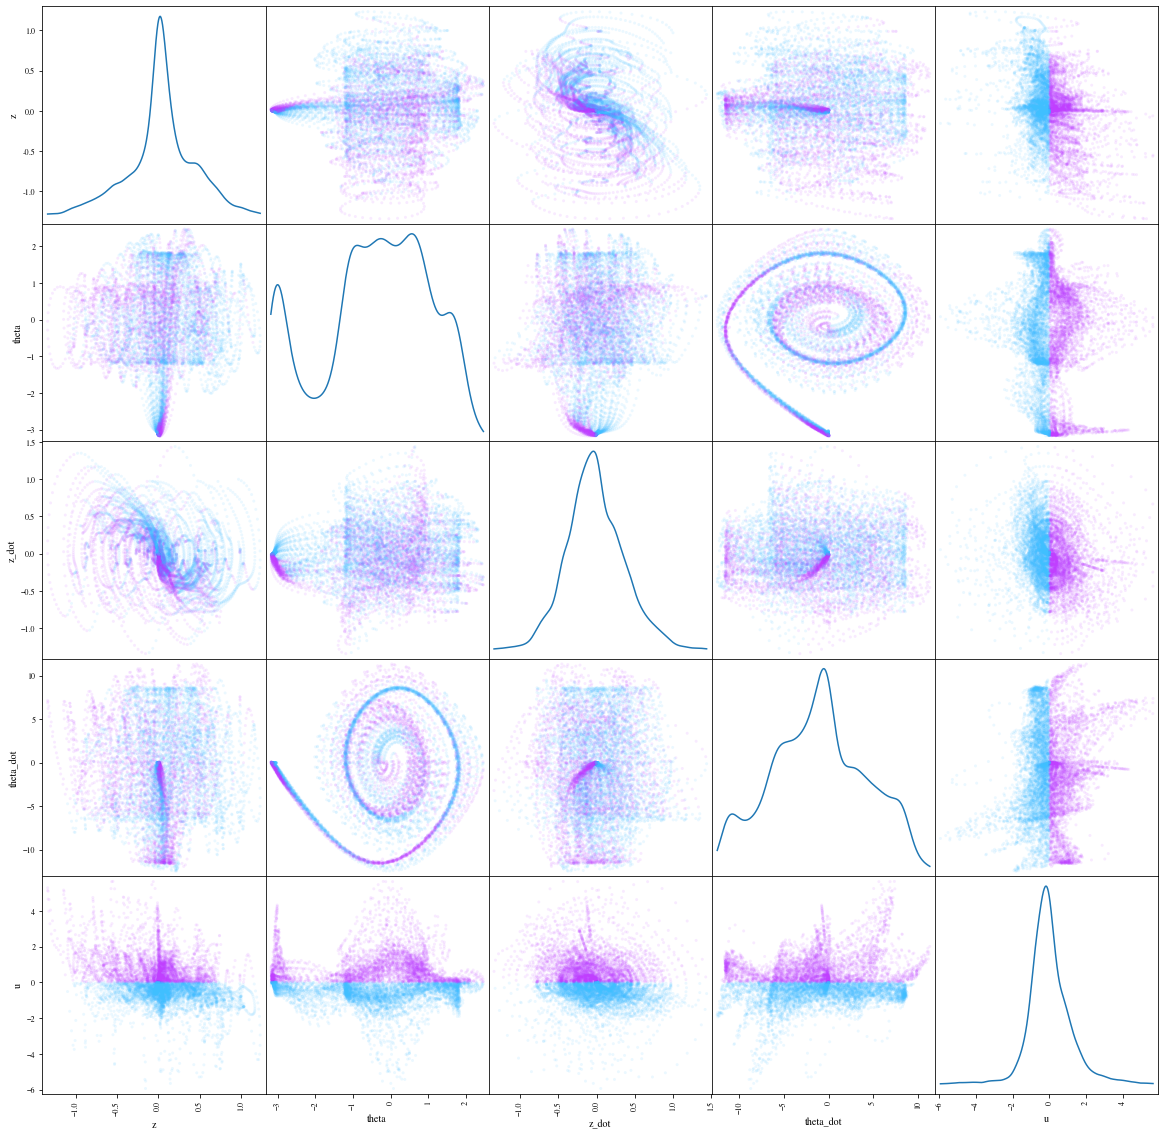

In [7]:
pd.plotting.scatter_matrix(df.drop(columns=["group"]), alpha=0.1, diagonal="kde", figsize=(20,20), c=df["u"] > 0, cmap="cool", vmin=-0.5, vmax=1.5);

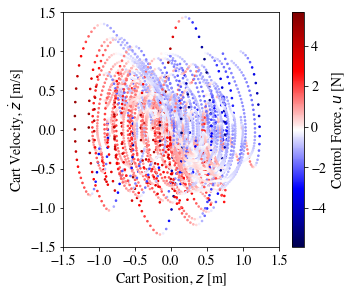

In [11]:
plt.figure(figsize=(5,4.2))
plt.scatter(df["z"], df["z_dot"], c=df["u"], alpha=1, marker=".", s=10, cmap="seismic")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel(r"Control Force, $u$ [N]", rotation=90, fontsize=14)
plt.xlabel(r"Cart Position, $z$ [m]", fontsize=14)
plt.ylabel(r"Cart Velocity, $\dot{z}$ [m/s]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.tight_layout()
plt.savefig("../figures/eda/z_z_dot_scatter.png", dpi=500)

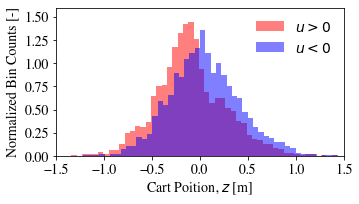

In [12]:
plt.figure(figsize=(5,3))
plt.hist(df["z_dot"][df["u"]>0], alpha=0.5, color="red", label=r"$u > 0$", density=True, bins=50)
plt.hist(df["z_dot"][df["u"]<0], alpha=0.5, color="blue", label=r"$u < 0$", density=True, bins=50)
plt.legend(frameon=False, fontsize=14)
plt.xlabel(r"Cart Poition, $z$ [m]", fontsize=14)
plt.ylabel("Normalized Bin Counts [-]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-1.5, 1.5])
plt.ylim([0,1.6])
plt.tight_layout()
plt.savefig("../figures/eda/z_hist.png", dpi=500)

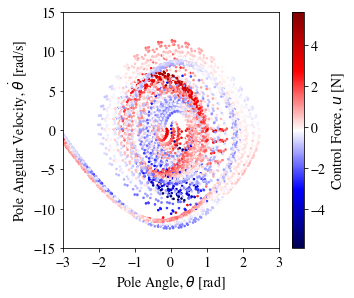

In [13]:
plt.figure(figsize=(5,4.25))
plt.scatter(df["theta"], df["theta_dot"], alpha=1, c=df["u"], marker=".", s=10, cmap="seismic")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel(r"Control Force, $u$ [N]", rotation=90, fontsize=14)
plt.xlabel(r"Pole Angle, $\theta$ [rad]", fontsize=14)
plt.ylabel(r"Pole Angular Velocity, $\dot{\theta}$ [rad/s]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-3, 3])
plt.ylim([-15, 15])
plt.tight_layout()
plt.savefig("../figures/eda/theta_theta_dot_scatter.png", dpi=500)